smoke detection iot

A smoke detector is a device that senses smoke, typically as an indicator of fire. Smoke detectors are usually housed in plastic enclosures, typically shaped like a disk about 150 millimeters (6 in) in diameter and 25 millimeters (1 in) thick, but shape and size vary.
The author of this dataset has successfully created a smoke detection device with the help of IOT devices and an AI model.
About the dataset
The training data collection is performed with the help of IOT devices since the goal is to develop an AI-based smoke detector device.
Many different environments and fire sources must be sampled to ensure a good dataset for training.
The dataset is nearly 60.000 readings long. The sample rate is 1Hz for all sensors. A UTC timestamp is added to every sensor reading to keep track of the data.


In [52]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt


In [53]:
from google.colab import files
uploaded = files.upload()

Saving smoke_detection_iot.csv to smoke_detection_iot (1).csv


In [78]:
import io
data = pd.read_csv(io.BytesIO(uploaded['smoke_detection_iot (1).csv']))

In [79]:
data.head()


,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [81]:
data.isnull().sum()

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [82]:
data.skew()

Unnamed: 0         0.000000
UTC                2.546510
Temperature[C]    -0.619907
Humidity[%]       -2.460755
TVOC[ppb]          6.776903
eCO2[ppm]         12.459812
Raw H2            -2.910064
Raw Ethanol       -1.684619
Pressure[hPa]     -3.603997
PM1.0             10.752666
PM2.5             14.146225
NC0.5             10.041323
NC1.0             14.447496
NC2.5             17.736729
CNT                0.324240
Fire Alarm        -0.950550
dtype: float64

In [83]:
data.describe()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,62630.000000,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,31314.500000,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,18079.868017,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,0.000000,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15657.250000,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,31314.500000,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,46971.750000,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,62629.000000,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


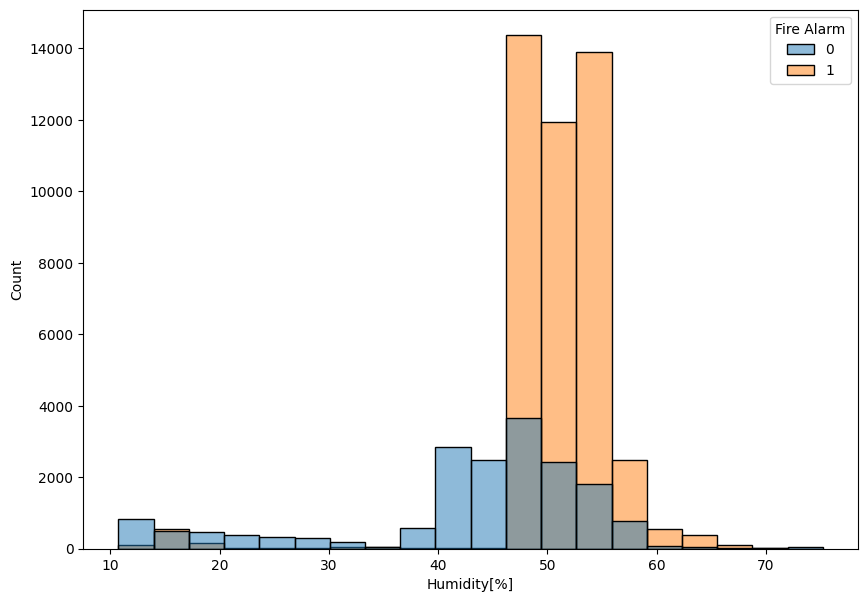

In [84]:
plt.figure(figsize = (10, 7))
sns.histplot(data, x = "Humidity[%]", bins = 20, hue = "Fire Alarm", )
plt.show()

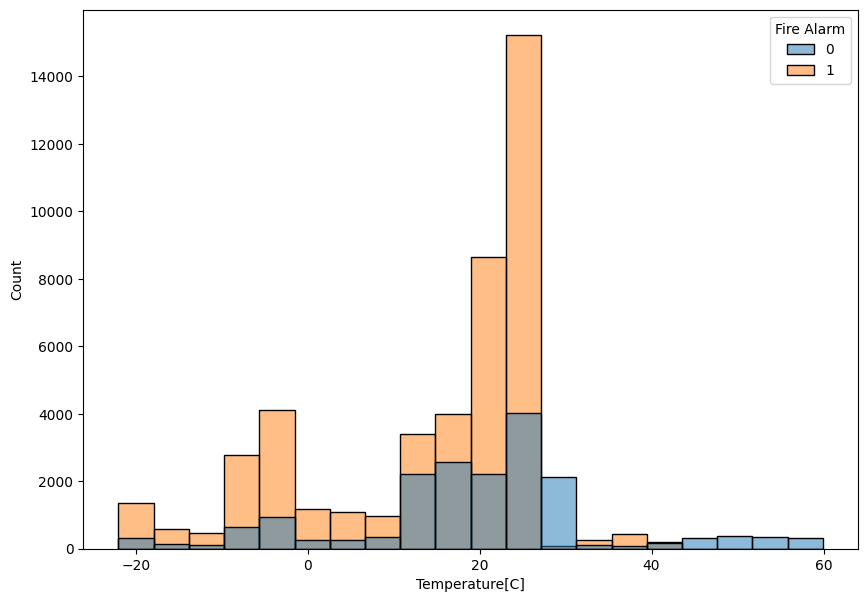

In [85]:
plt.figure(figsize =(10,7))
sns.histplot(data, x='Temperature[C]',bins =20,hue = 'Fire Alarm')
plt.show()

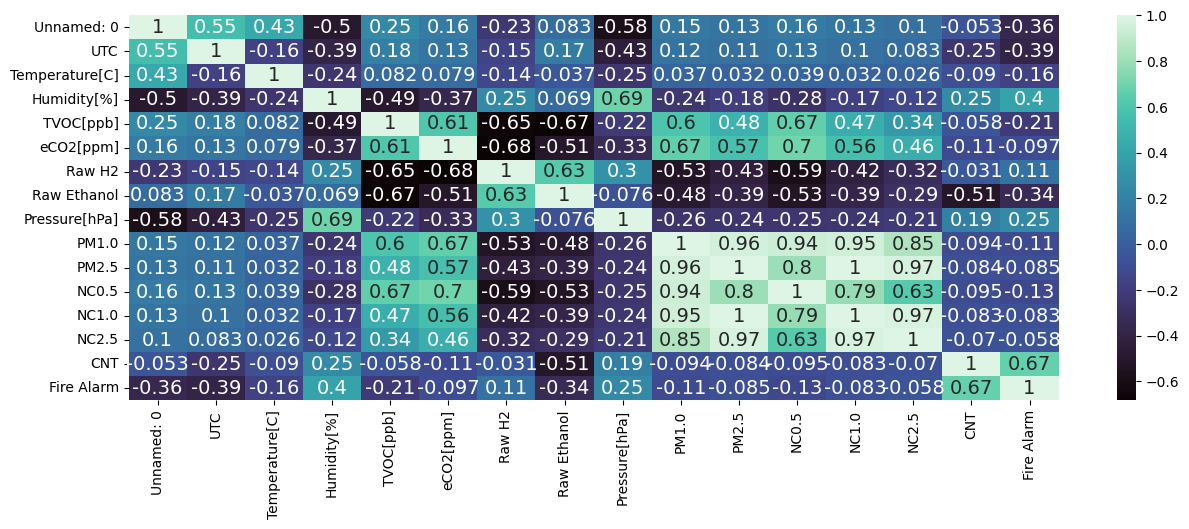

In [86]:
#heatmap
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(),annot=True,cmap='mako',annot_kws={"size":14})
plt.show()

<Axes: ylabel='count'>

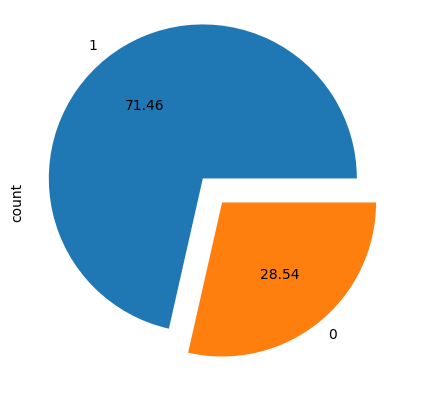

In [87]:
fig = plt.figure(figsize = (10,5))
myexplode = [0.2, 0]
data['Fire Alarm'].value_counts().plot(kind ='pie',autopct = '%.2f',explode = myexplode)

<ipython-input-88-2eb31342459d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr, y=labels, palette='mako')


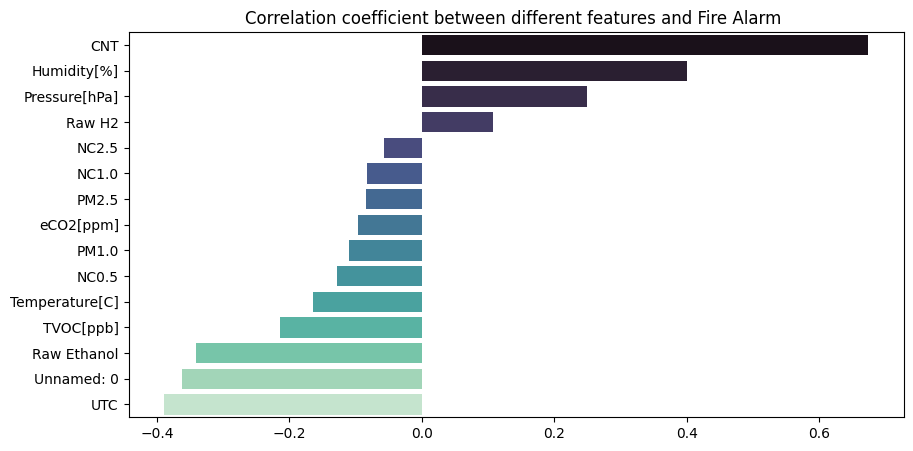

In [88]:
plt.figure(figsize=(10,5))
data_4 = data.corr()["Fire Alarm"].sort_values(ascending=False)
indices = data_4.index
labels = []
corr = []
for i in range(1, len(indices)):
    labels.append(indices[i])
    corr.append(data_4[i])
sns.barplot(x=corr, y=labels, palette='mako')
plt.title('Correlation coefficient between different features and Fire Alarm ')
plt.show()


In [89]:
data.shape

(62630, 16)

In [90]:
X=data.iloc[:,0:15].values
Y=data['Fire Alarm'].values

In [91]:
print(type(Y))
print(type(X))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 1/3,random_state = 0)

In [93]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(41753, 15)
(20877, 15)
(41753,)
(20877,)


In [101]:
from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler()
X_train = stdscaler.fit_transform(X_train)
X_test = stdscaler.transform(X_test)

Decision tree



In [102]:

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=7, min_samples_leaf=5)
clf.fit(X_train,Y_train)
Y_predict=clf.predict(X_test)
print(Y_predict)
#confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test, Y_predict)
print(cm)

#accuracy score of the model
print('Accuracy score :',accuracy_score(Y_test,Y_predict))

[0 1 1 ... 1 1 1]
[[ 6019     0]
 [    2 14856]]
Accuracy score : 0.9999042007951334


In [103]:

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,roc_curve,auc,precision_recall_curve
cm=confusion_matrix(Y_test,Y_predict)
print(cm)
print(accuracy_score(Y_test,Y_predict))
print(precision_score(Y_test,Y_predict))
print(recall_score(Y_test,Y_predict))
print(f1_score(Y_test,Y_predict))

[[ 6019     0]
 [    2 14856]]
0.9999042007951334
1.0
0.9998653923812088
0.9999326916604968


In [104]:
fpr,tpr,threshold=roc_curve(Y_test,Y_predict)
roc_auc=auc(fpr,tpr)
print(roc_auc)

0.9999326961906043


In [105]:
precision,recall,threshold=precision_recall_curve(Y_test,Y_predict)
prc_auc=auc(recall,precision)
print(prc_auc)

0.9999805957930377


<Axes: title={'center': 'confusion_matrix'}>

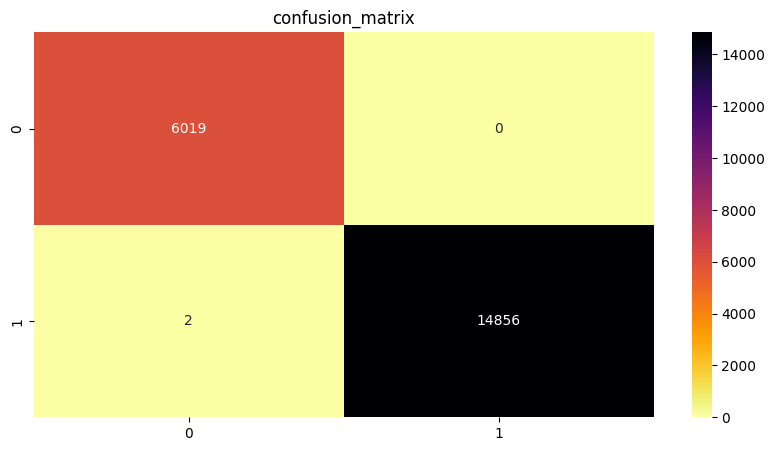

In [100]:
plt.figure(figsize=(10,5))
plt.title('confusion_matrix')
sns.heatmap(cm,annot=True,fmt='d',cmap='inferno_r')

In experiments that involve using visualization and classification algorithms, such as decision trees, to detect smoke and classify it as a fire indicator, it's common to encounter varying accuracies across different algorithms. Decision tree models may yield different accuracies compared to other classification algorithms due to their inherent structure and the nature of the data. A confusion matrix can be created to analyze the performance of these algorithms, which provides insight into their ability to correctly classify instances of smoke detection and fire indication. Understanding the strengths and limitations of each algorithm is crucial in selecting the most appropriate one for the task, and further experimentation and fine-tuning of parameters may enhance the performance of classification models in smoke detection applications.